- Nama   : Ahmad Fadlih Wahyu Sardana
- NIM    : 2341720069
- Kelas  : TI-3F

#Praktikum 1
Exact NN vs. ANNOY

Pengantar
Pada percobaan 1 kali ini, kita akan mencoba membandingkan hasil dari exact NN dengan ANNOY. data yang kita buat adalah data random 2D, dengan 1000 data point, mencari 3 data terdekat dari query point, Metric Similarity menggunakan Euclidean, dengan 3 tree Annoy.

#Langkah 1 - Install Library ANNOY

In [1]:
# Install ANNOY
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 15.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551629 sha256=f5044b35e590ecfa734e71123fbcb2f22e9c10c89a5da13dfa09782de35c87ee
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


#Langkah 2 - Import Library

In [2]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

#Langkah 3 - Membuat Dataset Dummy

In [3]:
# Build Random Dataset and Query Point
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # random value at 100x100 space

# Query point (pick 1 random data point)
query = X[np.random.randint(0, n_points)]

#Langkah 4 - Exact NN
Pada langkah ini, Anda akan mengkomputasi jarak terdekat dengan menggunakan metode brute force. Perhatikan waktu yang dihasilkan!

In [4]:
# Compute Exact NN Using Brute Force
# It will visit the data one by one
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 0.7575 ms


#Langkah 5 - Perhitungan Jarak dengan ANNOY
Selanjutnya, bandingkan dengan ANNOY. Jumlah Tree yang digunakan adalah 3.

In [5]:
# ANNOY 3 Tree
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # 3 trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # find 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")


Annoy NN index: [219, 898, 593]
Annoy NN jarak: [np.float64(0.0), np.float64(1.369159376273702), np.float64(2.2793154441691197)]
Waktu Annoy: 0.077 ms


Dapat dilihat perbedaan waktu yang sangat signifikan. ANNOY hanya memerlukan waktu 0.13ms sedangkan NN konvensional mencapai 9.17ms.

#Langkah 6 - Visualisasi Hasil NN
Untuk mengetahui tingkat ketepatan prediksi NN dari ANNOY, lakukan proses visualisasi sehingga Anda dapat mengetahui titik exact NN dibandingkan dengan perkiraan NN dari ANNOY.

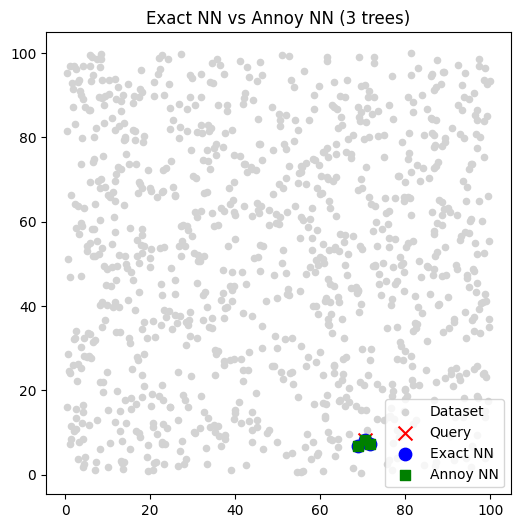

In [6]:
# Visualize
# Knowing the NN produced by Exact NN and ANNOY
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

Terlihat bahwa ANNOY tidak memilih NN tepat seperti exact NN. Akan tetapi, posisi ini sudah cukup untuk kebutuhan pencarian kedekatan dengan jumlah data yang besar dengan kompensasi waktu yang lebih cepat. Ingat, tujuan utama ANNOY adalah mencari titik balance antara akurasi klasterisasi dan kecepatan.

#Praktikum 2
Exact NN vs. FAISS

Pengantar
Pada percobaan kali ini kita akan membuat pencarian sederhana menggunakan FAISS. Install FAISS terlebih dahulu menggunakan FAISS-CPU, jika ingin menggunakan GPU, dapat lakukan instalasi FAISS-GPU.

#Langkah 1 Install FAISS

In [7]:
!pip install faiss-cpu
!pip install faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 72.1 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement faiss-gpu (from versions: none)
ERROR: No matching distribution found for faiss-gpu


#Langkah 2 - Import Library

In [8]:
import numpy as np
import faiss
import matplotlib.pyplot as plt
import time

#Langkah 3 - Membuat Dummy Dataset

In [9]:
# Build random data
np.random.seed(42)
X = np.random.rand(1000, 2).astype('float32')  # 1000 data 2D
query = np.array([[0.5, 0.5]], dtype='float32')  # query point

#Langkah 4 - Buat Model Exact NN

In [10]:
# Search NN using Exact NN
index_flat = faiss.IndexFlatL2(2)   # L2 = Euclidean distance
index_flat.add(X)

# Compute Exact NN Time
start = time.time()
D_flat, I_flat = index_flat.search(query, 3)  # Find 3 NN
end = time.time()
time_flat = end - start

#Langkah 5 - Buat Model FAISS

In [11]:
# Compute FAISS
nlist = 10   # n-cluster (inverted list)
m = 2        # number of subvector
quantizer = faiss.IndexFlatL2(2)   # used by IVF for initiatl cluster
index_ivfpq = faiss.IndexIVFPQ(quantizer, 2, nlist, m, 8)  # 8 bit per subvector

index_ivfpq.train(X)  # training centroid
index_ivfpq.add(X)

start = time.time()
D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
end = time.time()
time_ivfpq = end - start

#Langkah 6 - Cek Hasil Performa

In [12]:
# Print The Peformances
print("Exact NN (Flat) indices:", I_flat, "distances:", D_flat)
print("IVF+PQ indices:", I_ivfpq, "distances:", D_ivfpq)
print("Waktu Exact:", time_flat)
print("Waktu IVF+PQ:", time_ivfpq)

Exact NN (Flat) indices: [[137 170 750]] distances: [[0.00013095 0.00077404 0.00079751]]
IVF+PQ indices: [[137 170 750]] distances: [[0.00012945 0.00079226 0.00080067]]
Waktu Exact: 0.00015544891357421875
Waktu IVF+PQ: 0.00010800361633300781


Hasilnya,

Copy
Exact NN (Flat) indices: [[137 170 750]] distances: [[0.00013095 0.00077404 0.00079751]]
IVF+PQ indices: [[137 170 750]] distances: [[0.00012945 0.00079226 0.00080067]]
Waktu Exact: 0.00035691261291503906
Waktu IVF+PQ: 0.0001952648162841797
FAISS dapat mengungguli exact NN dengan nilai yang tipis. Namun ingat, kita belum mencoba dengan data yang lebih besar. Data dummy yang digunakan hanya 1000x1000.

#Langkah 7 - Visualisasi

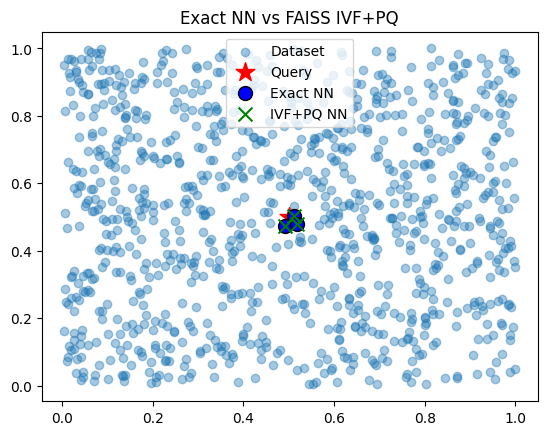

In [13]:
#Untuk lebih jelas mengetahui perkiraan NN yang dibuat oleh FAISS, Anda dapat melakukan visualisasi.

# Visualize
plt.scatter(X[:,0], X[:,1], alpha=0.4, label="Dataset")
plt.scatter(query[:,0], query[:,1], c='red', marker='*', s=200, label="Query")

# Flat NN -> Exact NN
plt.scatter(X[I_flat[0],0], X[I_flat[0],1], c='blue', s=100, edgecolor='k', label="Exact NN")

# IVF+PQ NN -> FAISS
plt.scatter(X[I_ivfpq[0],0], X[I_ivfpq[0],1], c='green', marker='x', s=100, label="IVF+PQ NN")

plt.legend()
plt.title("Exact NN vs FAISS IVF+PQ")
plt.show()

#Praktikum 3
Exact NN vs. HNSW

Pengantar
Pada praktikum ini, kita akan melakukan hal yang sama dengan praktikum sebelumnya. Akan tetapi, kali ini kita akan membandingkan exact NN dengan HNSW.

#Langkah 1 - Instal Library

In [14]:
!pip install hnswlib

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hnswlib: filename=hnswlib-0.8.0-cp312-cp312-linux_x86_64.whl size=2528046 sha256=2b7586dcff869b446b4f908d34583450554018ae0cbef602905d2e922edb2da2
  Stored in directory: /root/.cache/pip/wheels/ac/39/b3/cbd7f9cbb76501d2d5fbc84956e70d0b94e788aac87bda465e
Successfully built hnswlib


#Langkah 2 - Import Library

In [15]:
import hnswlib
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors

#Langkah 3 - Buat Dataset Dummy

In [16]:
# Build Dummy Dataset
num_elements = 1000
dim = 2
data = np.random.random((num_elements, dim)).astype(np.float32)

# Query point
query = np.array([[0.5, 0.5]], dtype=np.float32)
k = 5  # cari 5 tetangga terdekat

#Langkah 4 - Buat Model NN

In [17]:
# Build NN Model
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(data)

# Compute time performace
start = time.time()
distances, indices = nn.kneighbors(query)
end = time.time()

print("=== Exact NN ===")
print("Indices:", indices)
print("Distances:", distances)
print("Waktu:", end - start, "s")

=== Exact NN ===
Indices: [[830 247 473 913 592]]
Distances: [[0.00993625 0.01363944 0.01646171 0.03779694 0.03859071]]
Waktu: 0.023316144943237305 s


#Langkah 5 - Buat Model HNSW

In [18]:
# Initiate Index
p = hnswlib.Index(space='l2', dim=dim)

# Define Max Elements
p.init_index(max_elements=num_elements, ef_construction=100, M=16)

# Add Data
p.add_items(data)

# Set searching parameter
p.set_ef(50)   # tradeoff speed vs accuracy

start = time.time()
labels, distances = p.knn_query(query, k=k)
end = time.time()

print("\n=== HNSW ===")
print("Indices:", labels)
print("Distances:", distances)
print("Waktu:", end - start, "s")


=== HNSW ===
Indices: [[830 247 473 913 592]]
Distances: [[9.8728990e-05 1.8603441e-04 2.7098786e-04 1.4286089e-03 1.4892431e-03]]
Waktu: 9.274482727050781e-05 s


#Praktikum 4
ANNOY vs. FAISS vs. HNSW

Percobaan kali ini kita akan melihat perbedaan ketiga model yang telah kita bahas dan bandingkan hasilnya.

In [19]:
import numpy as np
import time
from annoy import AnnoyIndex
import faiss
import hnswlib

# ===============================
# Build 1mio rows with 5D
# ===============================
n_data = 1_000_000   # try 100_000 if you have limited memory
dim = 5
X = np.random.random((n_data, dim)).astype(np.float32)

# Query point
query = np.random.random((1, dim)).astype(np.float32)
k = 10

# ===============================
# 2. Annoy
# ===============================
print("=== Annoy ===")
ann_index = AnnoyIndex(dim, 'euclidean')

start = time.time()
for i in range(n_data):
    ann_index.add_item(i, X[i])
ann_index.build(10)  # 10 trees
build_time = time.time() - start

start = time.time()
neighbors = ann_index.get_nns_by_vector(query[0], k, include_distances=True)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", neighbors[0][:5], "...")

# ===============================
# 3. FAISS (Flat Index)
# ===============================
print("\n=== FAISS (IndexFlatL2) ===")
faiss_index = faiss.IndexFlatL2(dim)

start = time.time()
faiss_index.add(X)
build_time = time.time() - start

start = time.time()
distances, indices = faiss_index.search(query, k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", indices[0][:5], "...")

# ===============================
# 4. HNSW (hnswlib)
# ===============================
print("\n=== HNSW (hnswlib) ===")
hnsw_index = hnswlib.Index(space='l2', dim=dim)

start = time.time()
hnsw_index.init_index(max_elements=n_data, ef_construction=200, M=16)
hnsw_index.add_items(X)
build_time = time.time() - start

hnsw_index.set_ef(50)

start = time.time()
labels, distances = hnsw_index.knn_query(query, k=k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", labels[0][:5], "...")

=== Annoy ===
Build time: 7.60357666015625 detik
Query time: 0.00016427040100097656 detik
Neighbors: [129179, 559276, 630783, 213191, 559393] ...

=== FAISS (IndexFlatL2) ===
Build time: 0.006178855895996094 detik
Query time: 0.0039980411529541016 detik
Neighbors: [129179 559276 630783 213191 559393] ...

=== HNSW (hnswlib) ===
Build time: 56.29364323616028 detik
Query time: 0.00017523765563964844 detik
Neighbors: [129179 559276 630783 213191 559393] ...


#Praktikum 5
Uji Performansi ANN dengan Recall Query

Untuk membandingkan ANN, biasanya menggunakan metrics Recall Query (berapa banyak nearest neighbors yang ditemukan dengan benar dan diplot dalam bentuk grafik untuk dapat memudahkan melihat perbedaannya. Salah satu repo yang sering digunakan adalah ANN Benchmark https://github.com/erikbern/ann-benchmarks

Grafik perbandingan Approximate Nearest Neighbor (ANN) digambarkan dengan sumbu X sebagai recall dan sumbu Y sebagai queries per second (QPS). Recall menunjukkan seberapa banyak tetangga yang benar-benar sesuai dengan hasil pencarian exact nearest neighbor. Nilai recall mendekati 1 berarti hasil pencarian hampir sama persis dengan pencarian exact, sedangkan recall rendah berarti banyak tetangga yang ditemukan salah. Di sisi lain, QPS menunjukkan kecepatan algoritma dalam menjawab query, semakin tinggi nilainya berarti semakin cepat.

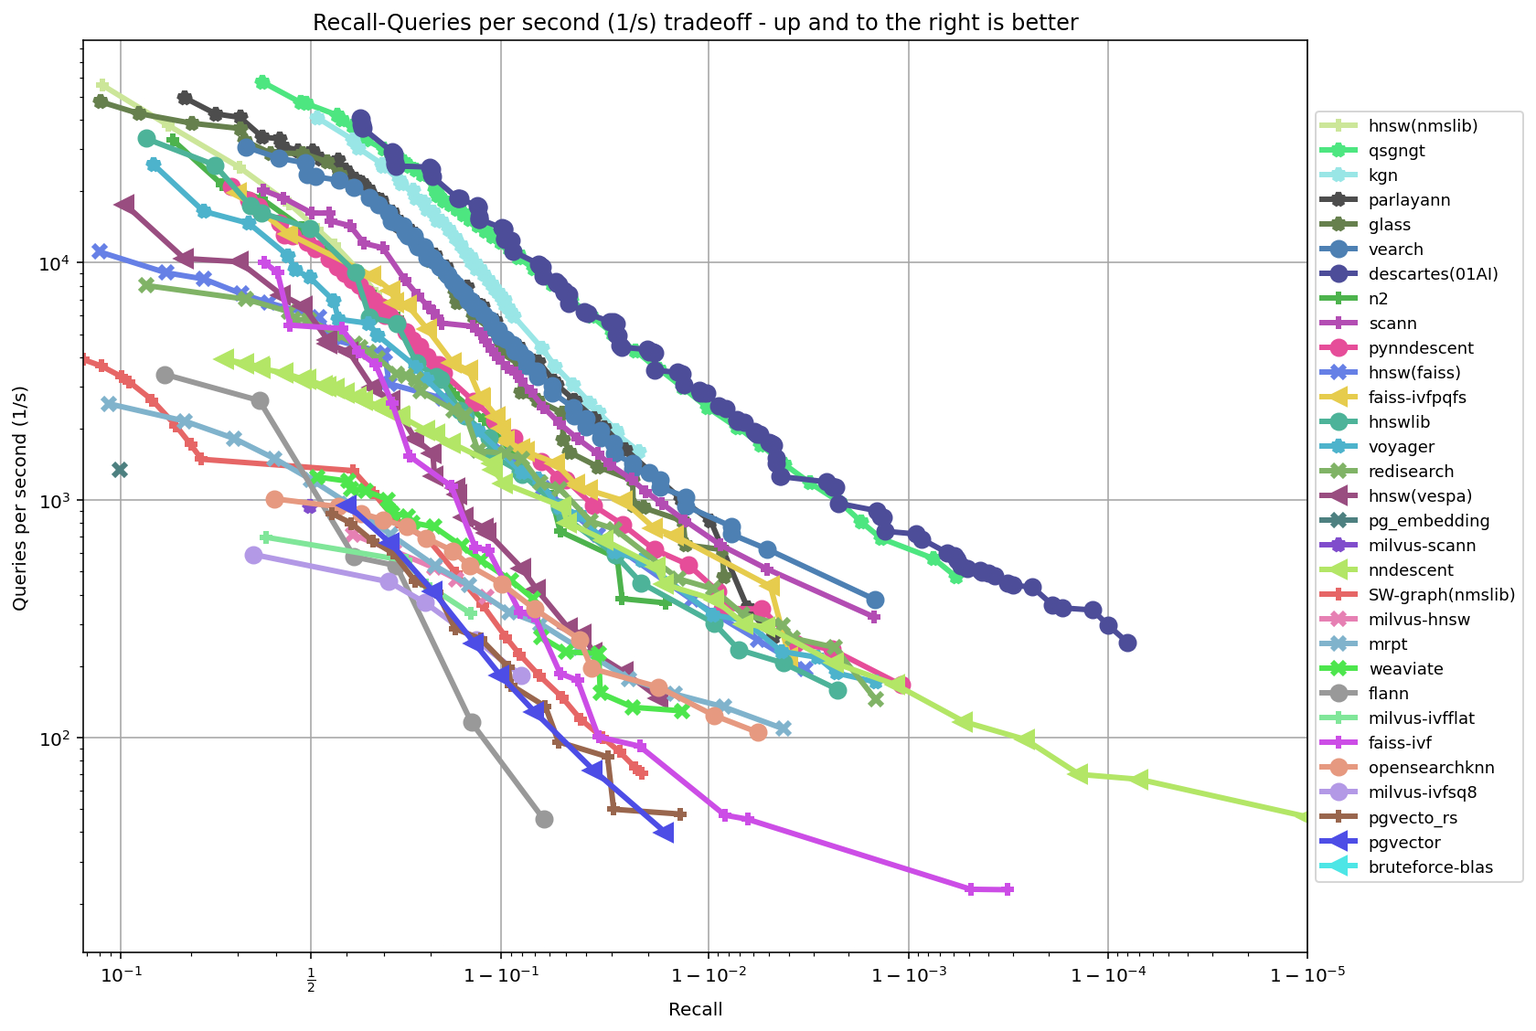

Interpretasi grafiknya adalah bahwa posisi kanan atas menunjukkan kondisi ideal, yaitu algoritma yang mampu memberikan hasil akurat (recall tinggi) sekaligus cepat (QPS tinggi). Posisi kanan bawah berarti akurat tapi lambat, sementara kiri atas berarti cepat tetapi kurang akurat. Dengan demikian, setiap algoritma ANN sebenarnya melakukan kompromi antara akurasi dan kecepatan. Semakin kita menginginkan hasil yang lebih akurat, biasanya kecepatan pencarian akan sedikit menurun, sehingga titik grafik cenderung bergeser ke kanan bawah.


Penggunaan Repository ann benchmark memerlukan docker agar dapat dijalankan dengan baik. sayangnya Google Colab belum dilengkapi dengan docker, sehingga kita akan mencoba memvisualisasikan dengan grafik sederhana saja yang akan memberikan hasil yang mirip dengan ann benchmark.

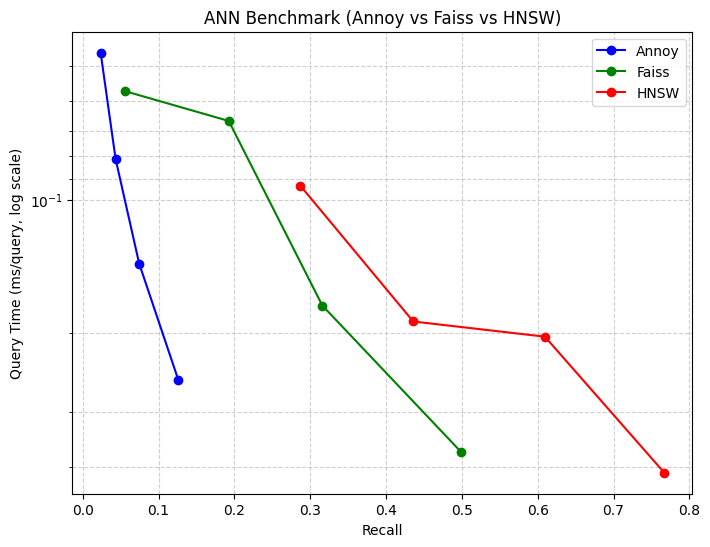

In [20]:
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
import matplotlib.pyplot as plt

# -------------------------------
# Dataset random
# -------------------------------
d = 128        # dimensi
nb = 100000    # jumlah database vector
nq = 1000      # jumlah query

np.random.seed(42)
xb = np.random.random((nb, d)).astype('float32')
xq = np.random.random((nq, d)).astype('float32')

# -------------------------------
# Ground truth dengan FAISS brute force
# -------------------------------
index_flat = faiss.IndexFlatL2(d)
index_flat.add(xb)
k = 10
_, gt_idx = index_flat.search(xq, k)

# -------------------------------
# Fungsi recall
# -------------------------------
def recall_at_k(I_pred, I_gt, k):
    correct = 0
    for i in range(len(I_pred)):
        correct += len(set(I_pred[i][:k]) & set(I_gt[i][:k]))
    return correct / (len(I_pred) * k)

# -------------------------------
# Benchmark Annoy
# -------------------------------
def run_annoy(xb, xq, n_trees=10, search_k=1000, k=10):
    f = xb.shape[1]
    index = AnnoyIndex(f, 'euclidean')
    for i, v in enumerate(xb):
        index.add_item(i, v)
    index.build(n_trees)

    start = time.time()
    I = [index.get_nns_by_vector(v, k, search_k=search_k) for v in xq]
    elapsed = (time.time() - start) * 1000 / len(xq)  # ms/query
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark FAISS IVF
# -------------------------------
def run_faiss(xb, xq, nlist=100, nprobe=10, k=10):
    quantizer = faiss.IndexFlatL2(d)
    index = faiss.IndexIVFFlat(quantizer, d, nlist, faiss.METRIC_L2)
    index.train(xb)
    index.add(xb)

    index.nprobe = nprobe
    start = time.time()
    _, I = index.search(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark HNSW
# -------------------------------
def run_hnsw(xb, xq, ef=100, M=16, k=10):
    num_elements = xb.shape[0]
    p = hnswlib.Index(space='l2', dim=d)
    p.init_index(max_elements=num_elements, ef_construction=200, M=M)
    p.add_items(xb)
    p.set_ef(ef)

    start = time.time()
    I, _ = p.knn_query(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Jalankan benchmark dengan beberapa parameter
# -------------------------------
results = {"Annoy": [], "Faiss": [], "HNSW": []}

# Annoy
for sk in [200, 500, 1000, 2000]:
    rec, t = run_annoy(xb, xq, n_trees=10, search_k=sk)
    results["Annoy"].append((rec, t))

# FAISS
for npb in [1, 5, 10, 20]:
    rec, t = run_faiss(xb, xq, nlist=100, nprobe=npb)
    results["Faiss"].append((rec, t))

# HNSW
for ef in [50, 100, 200, 400]:
    rec, t = run_hnsw(xb, xq, ef=ef)
    results["HNSW"].append((rec, t))

# -------------------------------
# Visualisasi trade-off
# -------------------------------
plt.figure(figsize=(8,6))
for label, color in zip(results.keys(), ["blue","green","red"]):
    recall, qtime = zip(*results[label])
    plt.plot(recall, qtime, marker="o", label=label, color=color)

plt.xlabel("Recall")
plt.ylabel("Query Time (ms/query, log scale)")
plt.yscale("log")
plt.gca().invert_yaxis()  # invert Y, makin kanan makin turun
plt.title("ANN Benchmark (Annoy vs Faiss vs HNSW)")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.show()

#Tugas 1
1. Lakukan percobaan pada metric distance yang berbeda, 1000 vs 1.000.000 data, 2D vs 5D data, untuk algoritma,

- ANNOY

- FAISS

- HNSW

Catat performansinya dalam bentuk tabel, misal

Jumlah Data/Dimensi
ANNOY
FAISS
HNSW
1000/2D

1000/5D

1000000/2D

1000000/5D



In [21]:
import numpy as np
import time
from annoy import AnnoyIndex
import faiss
import hnswlib
from sklearn.neighbors import NearestNeighbors
import pandas as pd

# Function to run Annoy experiment
def run_annoy_exp(X, query, k, metric, n_trees=10):
    f = X.shape[1]
    try:
        ann_index = AnnoyIndex(f, metric)
    except Exception as e:
        return f"Error: {e}", f"Error: {e}"

    start = time.time()
    for i in range(X.shape[0]):
        ann_index.add_item(i, X[i])
    try:
        ann_index.build(n_trees)
    except Exception as e:
        return f"Error: {e}", f"Error: {e}"
    build_time = time.time() - start

    start = time.time()
    try:
        ann_index.get_nns_by_vector(query[0], k)
    except Exception as e:
        return f"Error: {e}", f"Error: {e}"
    query_time = time.time() - start
    return build_time, query_time

# Function to run FAISS experiment (IndexFlatL2/IndexFlatIP)
def run_faiss_exp(X, query, k, metric):
    try:
        if metric == 'euclidean':
            index = faiss.IndexFlatL2(X.shape[1])
        elif metric == 'dot':
            index = faiss.IndexFlatIP(X.shape[1])
        else:
            raise ValueError("Unsupported metric for FAISS Flat")
    except Exception as e:
        return f"Error: {e}", f"Error: {e}"


    start = time.time()
    try:
        index.add(X)
    except Exception as e:
        return f"Error: {e}", f"Error: {e}"
    build_time = time.time() - start

    start = time.time()
    try:
        index.search(query, k)
    except Exception as e:
        return f"Error: {e}", f"Error: {e}"
    query_time = time.time() - start
    return build_time, query_time

# Function to run HNSW experiment
def run_hnsw_exp(X, query, k, metric):
    space = 'l2' if metric == 'euclidean' else 'ip' if metric == 'dot' else None
    if space is None:
        return "Error: Unsupported metric for HNSW", "Error: Unsupported metric for HNSW"

    num_elements, dim = X.shape
    try:
        p = hnswlib.Index(space=space, dim=dim)
    except Exception as e:
        return f"Error: {e}", f"Error: {e}"


    start = time.time()
    try:
        p.init_index(max_elements=num_elements, ef_construction=200, M=16)
        p.add_items(X)
    except Exception as e:
        return f"Error: {e}", f"Error: {e}"
    build_time = time.time() - start

    p.set_ef(50) # Default search parameter
    start = time.time()
    try:
        p.knn_query(query, k=k)
    except Exception as e:
        return f"Error: {e}", f"Error: {e}"
    query_time = time.time() - start
    return build_time, query_time

# Experiment parameters
experiments = [
    {"n_data": 1000, "dim": 2, "metric": "euclidean"},
    {"n_data": 1000, "dim": 5, "metric": "dot"},
    {"n_data": 1000000, "dim": 2, "metric": "euclidean"},
    {"n_data": 1000000, "dim": 5, "metric": "dot"},
]

results = []

for exp in experiments:
    n_data = exp["n_data"]
    dim = exp["dim"]
    metric = exp["metric"]
    k = 10

    print(f"Running experiment for N={n_data}, Dim={dim}, Metric={metric}")

    # Generate data
    X = np.random.random((n_data, dim)).astype(np.float32)
    query = np.random.random((1, dim)).astype(np.float32)

    # Run experiments
    annoy_build, annoy_query = run_annoy_exp(X, query, k, metric)
    faiss_build, faiss_query = run_faiss_exp(X, query, k, metric)
    hnsw_build, hnsw_query = run_hnsw_exp(X, query, k, metric)

    results.append({
        "Data/Dim": f"{n_data}/{dim}D",
        "Metric": metric.capitalize(),
        "ANNOY (Build)": f"{annoy_build:.6f} s" if isinstance(annoy_build, float) else annoy_build,
        "ANNOY (Query)": f"{annoy_query:.6f} s" if isinstance(annoy_query, float) else annoy_query,
        "FAISS (Build)": f"{faiss_build:.6f} s" if isinstance(faiss_build, float) else faiss_build,
        "FAISS (Query)": f"{faiss_query:.6f} s" if isinstance(faiss_query, float) else faiss_query,
        "HNSW (Build)": f"{hnsw_build:.6f} s" if isinstance(hnsw_build, float) else hnsw_build,
        "HNSW (Query)": f"{hnsw_query:.6f} s" if isinstance(hnsw_query, float) else hnsw_query,
    })

# Display results in a table
df_results = pd.DataFrame(results)
display(df_results)

Running experiment for N=1000, Dim=2, Metric=euclidean
Running experiment for N=1000, Dim=5, Metric=dot
Running experiment for N=1000000, Dim=2, Metric=euclidean
Running experiment for N=1000000, Dim=5, Metric=dot


,Data/Dim,Metric,ANNOY (Build),ANNOY (Query),FAISS (Build),FAISS (Query),HNSW (Build),HNSW (Query)
0,1000/2D,Euclidean,0.004663 s,0.000026 s,0.000015 s,0.000024 s,0.005770 s,0.000025 s
1,1000/5D,Dot,0.005567 s,0.000028 s,0.000044 s,0.000023 s,0.013324 s,0.000027 s
2,1000000/2D,Euclidean,8.181111 s,0.000087 s,0.000907 s,0.003801 s,35.264864 s,0.000053 s
3,1000000/5D,Dot,9.105154 s,0.000081 s,0.001940 s,0.003511 s,42.412521 s,0.000058 s


#Tugas 2
Lakukan percobaan penggunaan ANNOY, FAISS, dan HNSWLIB pada dataset sekunder berukuran besar (Micro Spotify) pada link berikut: https://www.kaggle.com/datasets/bwandowando/spotify-songs-with-attributes-and-lyrics/data .

- Download data dan load CSV filenya (pilih dataset yg pertama dari dua dataset).

- Pilih hanya fitur numerik saja, dan lakukan normalisasi menggunakan StandardScaler.

- Lakukan pencarian track terdekat dan bandingkan hasilnya.

- Lakukan perbandingan pada exact NN, ANNOY, FAISS, dan HNSW

Boilerplate
Berikut kode dasar yang dapat Anda manfaatkan.

In [ ]:
import pandas as pd
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_csv("songs_with_attributes_and_lyrics.csv",
                 delimiter=",",
                 quotechar='"',
                 on_bad_lines='skip',
                 engine='python')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474861 entries, 0 to 474860
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                474861 non-null  object 
 1   name              474861 non-null  object 
 2   album_name        193563 non-null  object 
 3   artists           474861 non-null  object 
 4   danceability      474861 non-null  float64
 5   energy            474861 non-null  float64
 6   key               474861 non-null  object 
 7   loudness          474861 non-null  float64
 8   mode              474861 non-null  object 
 9   speechiness       474861 non-null  float64
 10  acousticness      474861 non-null  float64
 11  instrumentalness  474861 non-null  float64
 12  liveness          474861 non-null  float64
 13  valence           474861 non-null  float64
 14  tempo             474861 non-null  float64
 15  duration_ms       474861 non-null  float64
 16  lyrics            47

* Pilih hanya fitur numerik saja, dan lakukan normalisasi menggunakan **StandardScaler**.

In [ ]:
features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
]

X = df[features].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

np.random.seed(42)
query_index = np.random.randint(0, len(X_scaled))
query = X_scaled[query_index].reshape(1, -1)

k = 10

* Lakukan pencarian track terdekat dan bandingkan hasilnya.

In [ ]:
# ---------- Exact Nearest Neighbors ----------
print("=== Exact Nearest Neighbors (Sklearn) ===")
nbrs = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
start_time = time.time()
nbrs.fit(X_scaled)
distances_exact, indices_exact = nbrs.kneighbors(query)
time_exact = time.time() - start_time
print(f"Waktu pencarian: {time_exact:.4f} detik")

# ---------- ANNOY ----------
print("\n=== ANNOY ===")
dim = X_scaled.shape[1]
annoy_index = AnnoyIndex(dim, 'euclidean')
start_time = time.time()
for i, vec in enumerate(X_scaled):
    annoy_index.add_item(i, vec)
annoy_index.build(10)  # jumlah trees
indices_annoy = annoy_index.get_nns_by_vector(query.flatten(), k, include_distances=False)
time_annoy = time.time() - start_time
print(f"Waktu pencarian (termasuk build): {time_annoy:.4f} detik")

# ---------- FAISS ----------
print("\n=== FAISS ===")
d = X_scaled.shape[1]
index_faiss = faiss.IndexFlatL2(d)
start_time = time.time()
index_faiss.add(X_scaled.astype('float32'))
distances_faiss, indices_faiss = index_faiss.search(query.astype('float32'), k)
time_faiss = time.time() - start_time
print(f"Waktu pencarian (termasuk build): {time_faiss:.4f} detik")

# ---------- HNSWLIB ----------
print("\n=== HNSWLIB ===")
dim = X_scaled.shape[1]
num_elements = X_scaled.shape[0]
p = hnswlib.Index(space='l2', dim=dim)
start_time = time.time()
p.init_index(max_elements=num_elements, ef_construction=200, M=16)
p.add_items(X_scaled)
p.set_ef(50)
labels, distances = p.knn_query(query, k=k)
time_hnsw = time.time() - start_time
print(f"Waktu pencarian (termasuk build): {time_hnsw:.4f} detik")

=== Exact Nearest Neighbors (Sklearn) ===
Waktu pencarian: 0.0398 detik

=== ANNOY ===
Waktu pencarian (termasuk build): 9.0414 detik

=== FAISS ===
Waktu pencarian (termasuk build): 0.0240 detik

=== HNSWLIB ===
Waktu pencarian (termasuk build): 93.7005 detik


* Lakkan perbandingan pada exact NN, ANNOY, FAISS, dan HNSW


=== PERBANDINGAN HASIL DAN WAKTU ===
Exact NN waktu     : 0.0398 detik
ANNOY waktu        : 9.0414 detik
FAISS waktu        : 0.0240 detik
HNSWLIB waktu      : 93.7005 detik

Indeks hasil pencarian:
Exact NN : [121958  12953  12943   1610 443693  57638 340829 220861 443692 287397]
ANNOY    : [121958, 12953, 12943, 1610, 443693, 57638, 220861, 443692, 472689, 201246]
FAISS    : [121958  12953  12943   1610 443693  57638 340829 220861 443692 287397]
HNSWLIB  : [121958  12953  12943   1610 443693  57638 340829 220861 443692 287397]


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


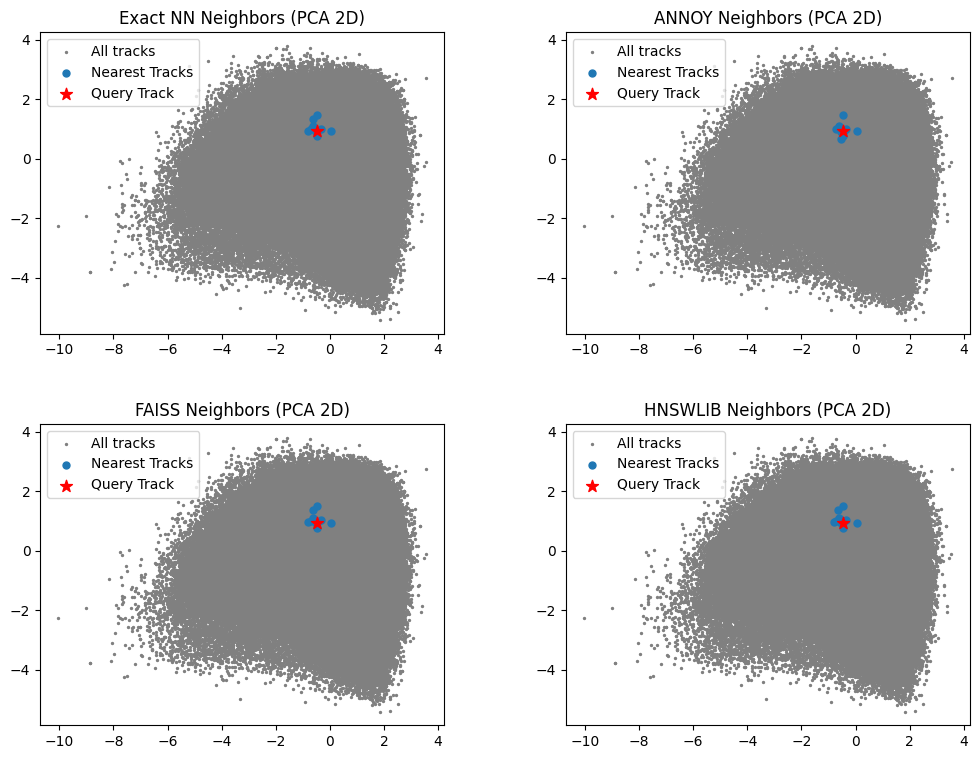

In [ ]:
print("\n=== PERBANDINGAN HASIL DAN WAKTU ===")
print(f"Exact NN waktu     : {time_exact:.4f} detik")
print(f"ANNOY waktu        : {time_annoy:.4f} detik")
print(f"FAISS waktu        : {time_faiss:.4f} detik")
print(f"HNSWLIB waktu      : {time_hnsw:.4f} detik")

print("\nIndeks hasil pencarian:")
print("Exact NN :", indices_exact.flatten())
print("ANNOY    :", indices_annoy)
print("FAISS    :", indices_faiss.flatten())
print("HNSWLIB  :", labels.flatten())

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
query_pca = X_pca[query_index]

fig, axes = plt.subplots(2, 2, figsize=(12, 9))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

titles = ["Exact NN", "ANNOY", "FAISS", "HNSWLIB"]
neighbors_list = [
    indices_exact.flatten(),
    indices_annoy,
    indices_faiss.flatten(),
    labels.flatten()
]

for ax, title, neighbors in zip(axes.ravel(), titles, neighbors_list):
    ax.scatter(X_pca[:, 0], X_pca[:, 1], s=2, color='gray', label='All tracks')
    ax.scatter(X_pca[neighbors, 0], X_pca[neighbors, 1], s=25, label='Nearest Tracks')
    ax.scatter(query_pca[0], query_pca[1], s=80, color='red', marker='*', label='Query Track')
    ax.set_title(f"{title} Neighbors (PCA 2D)")
    ax.legend()

plt.show()